In [1]:
import pandas as pd
import numpy as np

In [2]:
# define path for csv file
file_path_on_time = 'C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\Transit_On-Time_Performance_Route_past_year.csv'

In [3]:
# import csv file for on-time data for winnipeg transit 
on_time_df = pd.read_csv(file_path_on_time, delimiter=',')

In [4]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
0,10,St. Boniface-West Broadway,Downtown,Weekday,01/04/2023 12:00:00 AM,18:30-22:30,5,0,17
1,10,St. Boniface-West Broadway,Downtown,Weekday,01/05/2023 12:00:00 AM,18:30-22:30,1,0,21
2,10,St. Boniface-West Broadway,Downtown,Weekday,01/06/2023 12:00:00 AM,18:30-22:30,0,22,0
3,10,St. Boniface-West Broadway,Downtown,Weekday,01/09/2023 12:00:00 AM,18:30-22:30,0,21,1
4,10,St. Boniface-West Broadway,Downtown,Weekday,01/10/2023 12:00:00 AM,18:30-22:30,0,0,22
...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,05:00-09:00,22,30,150
233666,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,09:00-16:00,22,46,230
233667,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,16:00-18:30,18,43,60
233668,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,18:30-22:30,1,5,68


##### Starting with data cleaning.

In [5]:
# check data types 
on_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233670 entries, 0 to 233669
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Route Number       233670 non-null  object
 1   Route Name         233670 non-null  object
 2   Route Destination  233670 non-null  object
 3   Day Type           233670 non-null  object
 4   Day                233670 non-null  object
 5   Time Period        233670 non-null  object
 6   Early Stops        233670 non-null  int64 
 7   Late Stops         233670 non-null  int64 
 8   On-Time Stops      233670 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 16.0+ MB


In [6]:
# change datatype for Day to Datatime
on_time_df['Day'] = pd.to_datetime(on_time_df['Day'])

In [7]:
# change data type from object to integer
on_time_df['Early Stops'] = on_time_df['Early Stops'].astype(int)

In [8]:
on_time_df['Late Stops'] = on_time_df['Late Stops'].astype(int)

In [9]:
on_time_df['On-Time Stops'] = on_time_df['On-Time Stops'].astype(int)

In [10]:
# check updated datatypes 
on_time_df.dtypes

Route Number                 object
Route Name                   object
Route Destination            object
Day Type                     object
Day                  datetime64[ns]
Time Period                  object
Early Stops                   int32
Late Stops                    int32
On-Time Stops                 int32
dtype: object

In [11]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,18:30-22:30,5,0,17
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,18:30-22:30,1,0,21
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,18:30-22:30,0,22,0
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,18:30-22:30,0,21,1
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,18:30-22:30,0,0,22
...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,05:00-09:00,22,30,150
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,09:00-16:00,22,46,230
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,16:00-18:30,18,43,60
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18:30-22:30,1,5,68


### Defining Functions to check null values and duplicated values

In [12]:
def null_value_check (dataframe):
    """
    
    insert description of function here
    
    """
    null_count = dataframe.isnull().sum().sort_values(ascending=False)
    null_percent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([null_count, null_percent], axis=1, keys=['Total Null in column', 'Null percentage in Column'])
    return missing_data

def remove_duplicate_data (dataframe):
    """
    insert description of function here
    
    """
    duplicate_rows = dataframe[dataframe.duplicated()] # check for duplicate rows in dataframe
    if duplicate_rows.empty:
        print ("No Duplicate rows")
    else: 
        return dataframe.drop (index = duplicate_rows.index) # drop duplicate row if it exists


In [13]:
# check for any null values
null_value_check(on_time_df)

,Total Null in column,Null percentage in Column
Route Number,0,0.0
Route Name,0,0.0
Route Destination,0,0.0
Day Type,0,0.0
Day,0,0.0
Time Period,0,0.0
Early Stops,0,0.0
Late Stops,0,0.0
On-Time Stops,0,0.0


In [14]:
# check for duplicating values
remove_duplicate_data(on_time_df)

No Duplicate rows


In [15]:
# check unique routes
unique_route_count = on_time_df['Route Number'].nunique()
print(unique_route_count)

85


In [16]:
# Grouping the dataframe and showing each "Route Number" and "Route Name"
route_name_by_number = on_time_df.groupby('Route Number')['Route Name'].first().reset_index()

#showing result
print(route_name_by_number)

   Route Number                               Route Name
0            10               St. Boniface-West Broadway
1            11                         Portage-Kildonan
2            12                                  William
3            14                        Ellice-St. Mary's
4            15                         Sargent-Mountain
..          ...                                      ...
80           95                       Tuxedo - Riverview
81           96          St. Vital Centre - Windsor Park
82           97  Inkster Industrial Park - Point Douglas
83           98                Westdale - Grace Hospital
84         BLUE                               Route BLUE

[85 rows x 2 columns]


In [17]:
# describing numerical columns
on_time_df.describe()

,Early Stops,Late Stops,On-Time Stops
count,233670.000000,233670.000000,233670.000000
mean,40.953524,61.624428,146.909766
std,56.968016,93.583899,168.775998
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,34.000000
50%,20.000000,27.000000,96.000000
75%,56.000000,82.000000,197.000000
max,885.000000,1594.000000,1821.000000


#### Analyzing realtionship between Early Stops, On-Time Stops and Late Stops

In [18]:
#checking correlation matrix
print(on_time_df.corr())

               Early Stops  Late Stops  On-Time Stops
Early Stops       1.000000    0.254678       0.725021
Late Stops        0.254678    1.000000       0.425706
On-Time Stops     0.725021    0.425706       1.000000


C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\2309117773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(on_time_df.corr())


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

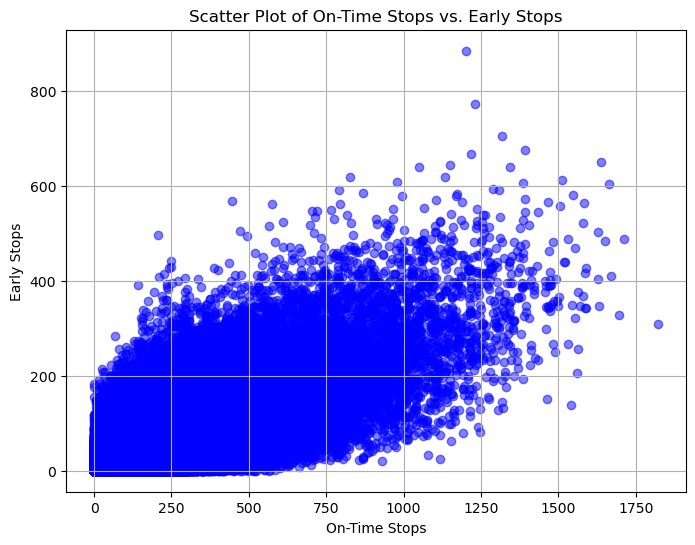

In [20]:
# As per correlation matrix there seems to be a strong correlation between Early stops and On-Time Stops
plt.figure(figsize=(8, 6))
plt.scatter(on_time_df['On-Time Stops'], on_time_df['Early Stops'], c='blue', alpha=0.5)
plt.title('Scatter Plot of On-Time Stops vs. Early Stops')
plt.xlabel('On-Time Stops')
plt.ylabel('Early Stops')
plt.grid(True)

# show the plot
plt.show()

##### As per Scatter plot it can be seen that as the number of On-Time stop increases the Early Stops also increases
##### : They are highly correlated

In [21]:
#sorting the data by Day(date) to see the range of dates for the data
df_sorted = on_time_df.sort_values(by='Day')

In [22]:
df_sorted

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
219797,650,McGillivray,Whyte Ridge via Kenaston Common,Sunday,2022-08-01,16:00-18:30,51,0,110
225959,BLUE,Route BLUE,Downtown,Sunday,2022-08-01,16:00-18:30,21,72,171
209254,12,William,Polo Park,Sunday,2022-08-01,09:00-16:00,46,76,128
225960,BLUE,Route BLUE,Downtown,Sunday,2022-08-01,18:30-22:30,27,136,144
224773,90,Kildonan Place - Whellams Lane,Henderson & Whellams,Sunday,2022-08-01,05:00-09:00,3,0,2
...,...,...,...,...,...,...,...,...,...
119788,83,Unicity - Strauss Dr - Murray Industrial Park,Unicity,Weekday,2023-07-31,09:00-16:00,13,82,173
119787,83,Unicity - Strauss Dr - Murray Industrial Park,Unicity,Weekday,2023-07-31,05:00-09:00,10,1,148
106073,17,McGregor,Amber Trails via,Weekday,2023-07-31,05:00-09:00,204,3,276
107248,19,Marion-Logan-Notre Dame,RRC Polytech via Notre Dame,Weekday,2023-07-31,16:00-18:30,43,164,94


#### Creating a stacked chart to see the percentage of times the bus was recorded as being early, on time, or late for each transit route

In [23]:
# calculate percentages for stops 
on_time_df['Early_Percentage'] = (on_time_df['Early Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

on_time_df['Late_Percentage'] = (on_time_df['Late Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

on_time_df['On_Time_Percentage'] = (on_time_df['On-Time Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

In [24]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,18:30-22:30,5,0,17,22.727273,0.000000,77.272727
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,18:30-22:30,1,0,21,4.545455,0.000000,95.454545
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,18:30-22:30,0,22,0,0.000000,100.000000,0.000000
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,18:30-22:30,0,21,1,0.000000,95.454545,4.545455
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,18:30-22:30,0,0,22,0.000000,0.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,05:00-09:00,22,30,150,10.891089,14.851485,74.257426
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,09:00-16:00,22,46,230,7.382550,15.436242,77.181208
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,16:00-18:30,18,43,60,14.876033,35.537190,49.586777
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18:30-22:30,1,5,68,1.351351,6.756757,91.891892


# Analyze Transit Performance between Summer 2022 and Summer 2023

### Creating a stacked bar Chart to show punctuality of bus schedule

#### Grouping data for each route station showing the average ('Early Stops, Late Stops, On-Time Stops) along with their percentage over the year 

#### Use the Grouped data to plot the graph to find the perecentage of Bus on time  performance for each route

In [25]:
grouped_data = on_time_df.groupby('Route Number').agg({
    'Early Stops': 'mean',
    'Late Stops': 'mean',
    'On-Time Stops': 'mean',
    'Early_Percentage': 'mean',
    'Late_Percentage': 'mean',
    'On_Time_Percentage': 'mean'
}).reset_index()

In [26]:
grouped_data

,Route Number,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage
0,10,21.924036,17.403855,66.100227,20.871500,17.905657,61.222842
1,11,46.923209,94.951170,174.109513,16.066882,30.585250,53.347868
2,12,46.024528,30.717736,159.569057,20.049812,13.732726,66.217463
3,14,59.836822,96.137105,221.087620,16.415431,29.164650,54.419919
4,15,36.187395,54.592979,125.539899,16.859915,25.928651,57.211434
...,...,...,...,...,...,...,...
80,95,70.547069,47.883980,177.313790,23.682689,17.915445,58.401866
81,96,30.222222,18.124918,82.788955,23.867546,15.631175,60.501279
82,97,12.783226,16.691613,60.036774,15.053746,18.249046,66.697208
83,98,28.377076,16.053026,78.688270,23.900267,12.744758,63.354974


In [27]:
grouped_data.to_csv('Transit_Performance.csv')

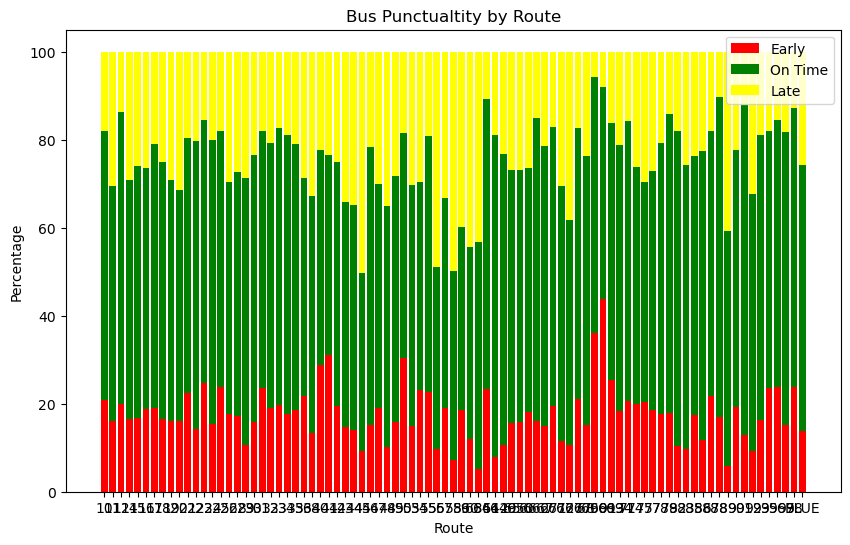

In [28]:
# Create the Chart
plt.figure(figsize=(10, 6))

plt.bar(grouped_data['Route Number'], grouped_data['Early_Percentage'], label='Early', color='red')
plt.bar(grouped_data['Route Number'], grouped_data['On_Time_Percentage'], bottom = grouped_data['Early_Percentage'], label='On Time', color='green')
plt.bar(grouped_data['Route Number'], grouped_data['Late_Percentage'], bottom = grouped_data['Early_Percentage'] + grouped_data['On_Time_Percentage'], label='Late', color='yellow')

# Add Labels and Legend
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.title('Bus Punctualtity by Route')
plt.legend()

#save the chart
plt.show()

## Importing Passangers data

In [29]:
daily_passenger_df = pd.read_csv('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\Estimated_Daily_Passenger_Activity_21.csv')

In [30]:
daily_passenger_df

,Schedule Period Name,Schedule Period Start Date,Schedule Period End Date,Stop Number,Route Number,Route Name,Day Type,Time Period,Average Boardings,Average Alightings,Location
0,Winter 2022,12/11/2022 12:00:00 AM,04/15/2023 12:00:00 AM,60304,78,Waverley,Weekday,Mid-Day,1.2,4.1,POINT (-97.1751738385805 49.8594874919762)
1,Winter 2022,12/11/2022 12:00:00 AM,04/15/2023 12:00:00 AM,60304,78,Waverley,Weekday,Night,0.0,0.0,POINT (-97.1751738385805 49.8594874919762)
2,Winter 2022,12/11/2022 12:00:00 AM,04/15/2023 12:00:00 AM,20289,26,Logan - Berry,Weekday,Mid-Day,0.4,1.0,POINT (-97.2093130959077 49.8788375268079)
3,Winter 2022,12/11/2022 12:00:00 AM,04/15/2023 12:00:00 AM,20289,26,Logan - Berry,Weekday,Morning,0.1,0.0,POINT (-97.2093130959077 49.8788375268079)
4,Winter 2022,12/11/2022 12:00:00 AM,04/15/2023 12:00:00 AM,20289,21,Portage Express,Weekday,PM Peak,7.7,2.0,POINT (-97.2093130959077 49.8788375268079)
...,...,...,...,...,...,...,...,...,...,...,...
321386,Summer 2023,06/18/2023 12:00:00 AM,09/02/2023 12:00:00 AM,50089,50,Archibald,Weekday,PM Peak,0.0,0.0,POINT (-97.0600878412749 49.8588415676833)
321387,Summer 2023,06/18/2023 12:00:00 AM,09/02/2023 12:00:00 AM,50089,50,Archibald,Weekday,Morning,0.6,0.5,POINT (-97.0600878412749 49.8588415676833)
321388,Summer 2023,06/18/2023 12:00:00 AM,09/02/2023 12:00:00 AM,50089,19,Marion-Logan-Notre Dame,Weekday,Mid-Day,2.2,0.8,POINT (-97.0600878412749 49.8588415676833)
321389,Summer 2023,06/18/2023 12:00:00 AM,09/02/2023 12:00:00 AM,50089,19,Marion-Logan-Notre Dame,Weekday,Evening,0.6,0.3,POINT (-97.0600878412749 49.8588415676833)


In [31]:
# check null values
null_value_check(daily_passenger_df)

,Total Null in column,Null percentage in Column
Schedule Period Name,0,0.0
Schedule Period Start Date,0,0.0
Schedule Period End Date,0,0.0
Stop Number,0,0.0
Route Number,0,0.0
Route Name,0,0.0
Day Type,0,0.0
Time Period,0,0.0
Average Boardings,0,0.0
Average Alightings,0,0.0


In [32]:
# check Duplicates and remove it
remove_duplicate_data(daily_passenger_df)


No Duplicate rows


In [33]:
# check datatypes
daily_passenger_df.dtypes

Schedule Period Name           object
Schedule Period Start Date     object
Schedule Period End Date       object
Stop Number                     int64
Route Number                   object
Route Name                     object
Day Type                       object
Time Period                    object
Average Boardings             float64
Average Alightings            float64
Location                       object
dtype: object

#### Changing the datatypes for Scedule period start date and schedule period end data to Datetime

In [34]:
daily_passenger_df ['Schedule Period Start Date'] = pd.to_datetime (daily_passenger_df['Schedule Period Start Date'])
daily_passenger_df['Schedule Period End Date'] = pd.to_datetime (daily_passenger_df['Schedule Period End Date'])

In [35]:
# check datatypes again
daily_passenger_df.dtypes

Schedule Period Name                  object
Schedule Period Start Date    datetime64[ns]
Schedule Period End Date      datetime64[ns]
Stop Number                            int64
Route Number                          object
Route Name                            object
Day Type                              object
Time Period                           object
Average Boardings                    float64
Average Alightings                   float64
Location                              object
dtype: object

#### Check unique route numbers 

In [36]:
print(daily_passenger_df['Route Number'].nunique())

113


In [37]:
# check unique route numbers for on-time data
print(on_time_df['Route Number'].nunique())

85


### Route numbers for Data

#### (1) Daily_passenger data : 113 Route Numbers

#### (2) On-Time data : 85 Route Numbers

-----------------------------------------

In [38]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,18:30-22:30,5,0,17,22.727273,0.000000,77.272727
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,18:30-22:30,1,0,21,4.545455,0.000000,95.454545
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,18:30-22:30,0,22,0,0.000000,100.000000,0.000000
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,18:30-22:30,0,21,1,0.000000,95.454545,4.545455
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,18:30-22:30,0,0,22,0.000000,0.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,05:00-09:00,22,30,150,10.891089,14.851485,74.257426
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,09:00-16:00,22,46,230,7.382550,15.436242,77.181208
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,16:00-18:30,18,43,60,14.876033,35.537190,49.586777
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18:30-22:30,1,5,68,1.351351,6.756757,91.891892


----------------------------------------------------------------

## We need to Join the Transit On_time and Daily_passenger data for further analysis

-----------------------------------------------------------------

### To Join the dataframes we need common columns

#### Defining a function to assign the schedule period Name column to  Transit On_Time data

In [40]:
def add_time_category (dataframe):
    
    """
    
    insert description here
    
    
    
    """
    date = dataframe.select_dtypes(include=['datetime64[ns]']) # search for datetime object in the dataframe
    Schedule_Period_Name =[]
   
    for day in date.iloc[:,0]: 
        # print(day)
        # print(type(day))
        year = day.year
        month = day.month
        month_text = day.strftime("%B")

        if month_text in ("December","January", "February","March", "April"):
            Schedule_Period_Name.append(f'Winter {year}')

        elif month_text in ("April", "May", "June"):
            Schedule_Period_Name.append(f'Spring {year}')
        
        elif month_text in ("June","July", "August", "September"):
            Schedule_Period_Name.append(f'Summer {year}')
        
        elif month_text in ("Sepember","October", "November", "December"):
            Schedule_Period_Name.append(f'Fall {year}')

    dataframe['Schedule Period Name'] = Schedule_Period_Name
    
    return dataframe

-----------------------------------------------------------------

In [41]:
# Add Time period Column to On_time df

on_time_df = add_time_category(on_time_df)

--------------------------------------------

## Defining a Function to Edit the time period in Transit On_Time data to match it with Daily Passenger Activity

### Function checks the Timeperiod column and replaces the value with the time of the day --e.g Morning, afternoon. to allign value with df_daily_passenger dataframe

In [ ]:
from datetime import datetime

def add_time_period_category (dataframe):
    
    time_period_category = [] 
    
    Morning_time_start = datetime.strptime("05:00:00", "%H:%M:%S")
    Mid_Day_time_start = datetime.strptime("09:00:00", "%H:%M:%S")
    PM_Peak_time_start = datetime.strptime("16:00:00", "%H:%M:%S")
    Evening_time_start = datetime.strptime("18:30:00", "%H:%M:%S")
    Night_time_start = datetime.strptime("22:30:00", "%H:%M:%S")
    Mid_night = datetime.strptime("00:00:00", "%H:%M:%S")
    
    for time_period in dataframe["Time Period"]:
        
        if type(time_period) == str:

            if time_period == "05:00-09:00":
                time_period_category.append("Morning")

            elif time_period == "09:00-16:00":
                time_period_category.append("Mid-Day")
        
            elif time_period == "16:00-18:30":
                time_period_category.append("PM Peak")
        
            elif time_period == "18:30-22:30":
                time_period_category.append("Evening")

            elif time_period == "22:30-05:00":
                time_period_category.append("Night")
                
        elif type(time_period) == pd.Timestamp:
            
            if time_period >= Morning_time_start and  time_period < Mid_Day_time_start :
                time_period_category.append("Morning") 
            elif time_period >= Mid_Day_time_start and  time_period < PM_Peak_time_start :
                time_period_category.append("Mid-Day") 
            elif time_period >= PM_Peak_time_start and  time_period < Evening_time_start :
                time_period_category.append("PM Peak") 
            elif time_period >= Evening_time_start and  Night_time_start < Mid_Day_time_start :
                time_period_category.append("Evening") 
            elif time_period >= Night_time_start and  time_period > Mid_night :
                time_period_category.append("Night") 
            
    new_dataframe = dataframe.drop(columns='Time Period')
    new_dataframe['Time Period'] = time_period_category 
    
    return new_dataframe
 
    

In [45]:
from datetime import datetime
def add_time_period_category (dataframe):
    
    time_period_category = [] 
    
    Morning_time_start = datetime.strptime("05:00", "%H:%M")
    Mid_Day_time_start = datetime.strptime("09:00", "%H:%M")
    PM_Peak_time_start = datetime.strptime("16:00", "%H:%M")
    Evening_time_start = datetime.strptime("18:30", "%H:%M")
    Night_time_start = datetime.strptime("22:30", "%H:%M")
    Mid_night = datetime.strptime("00:00", "%H:%M")
    
    for time_period in dataframe["Time Period"]:
        
        if type(time_period) == str:

            if time_period == "05:00-09:00":
                time_period_category.append("Morning")

            elif time_period == "09:00-16:00":
                time_period_category.append("Mid-Day")
        
            elif time_period == "16:00-18:30":
                time_period_category.append("PM Peak")
        
            elif time_period == "18:30-22:30":
                time_period_category.append("Evening")

            elif time_period == "22:30-05:00":
                time_period_category.append("Night")
                
        elif type(time_period) == pd.Timestamp:
            hour = time_period.hour
            minute = time_period.minute
            formated_date = datetime.strptime(f'{hour}:{minute}', "%H:%M")
            
                
            if formated_date >= Morning_time_start and  formated_date < Mid_Day_time_start :
                time_period_category.append("Morning") 
            elif formated_date >= Mid_Day_time_start and  formated_date < PM_Peak_time_start :
                time_period_category.append("Mid-Day") 
            elif formated_date >= PM_Peak_time_start and  formated_date < Evening_time_start :
                time_period_category.append("PM Peak") 
            # elif formated_date >= Evening_time_start and  formated_date < Mid_Day_time_start :
            #     time_period_category.append("Evening") 
            elif formated_date >= Night_time_start and  formated_date > Mid_night :
                time_period_category.append("Night") 
            else:
                time_period_category.append("Evening") 
                
    new_dataframe = dataframe.drop(columns='Time Period')
    new_dataframe['Time Period'] = time_period_category 
    
    
    return new_dataframe

    # dataframe['Time_Period'] = time_period_category
    # return dataframe
 

In [46]:
on_time_df = add_time_period_category(on_time_df)

------------------------------------------------------------------------------------

### Joining Transit On_Time and Passenger Activity Data

In [47]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage,Schedule Period Name,Time Period
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,5,0,17,22.727273,0.000000,77.272727,Winter 2023,Evening
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,1,0,21,4.545455,0.000000,95.454545,Winter 2023,Evening
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,0,22,0,0.000000,100.000000,0.000000,Winter 2023,Evening
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,0,21,1,0.000000,95.454545,4.545455,Winter 2023,Evening
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,0,0,22,0.000000,0.000000,100.000000,Winter 2023,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,22,30,150,10.891089,14.851485,74.257426,Spring 2023,Morning
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,22,46,230,7.382550,15.436242,77.181208,Spring 2023,Mid-Day
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18,43,60,14.876033,35.537190,49.586777,Spring 2023,PM Peak
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,1,5,68,1.351351,6.756757,91.891892,Spring 2023,Evening


#### Grouping Data

In [48]:
# group by transit on time data
agg_list = ['Early Stops', 'Late Stops', 'On-Time Stops', 'Early_Percentage', 'Late_Percentage', 'On_Time_Percentage']
agg_on_time_df = on_time_df.groupby(['Route Number', 'Route Name', 'Schedule Period Name', 'Day Type', 'Time Period'], as_index=False)[agg_list].mean()

In [49]:
agg_on_time_df

,Route Number,Route Name,Schedule Period Name,Day Type,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage
0,10,St. Boniface-West Broadway,Fall 2022,Saturday,Evening,16.125000,24.375000,88.500000,10.034842,34.472984,55.492173
1,10,St. Boniface-West Broadway,Fall 2022,Saturday,Mid-Day,24.000000,33.200000,133.300000,14.013051,14.684322,71.302627
2,10,St. Boniface-West Broadway,Fall 2022,Saturday,Morning,15.400000,9.100000,95.200000,12.981645,7.798325,79.220030
3,10,St. Boniface-West Broadway,Fall 2022,Saturday,Night,21.916667,4.166667,43.166667,29.565815,6.362271,64.071913
4,10,St. Boniface-West Broadway,Fall 2022,Saturday,PM Peak,6.625000,18.375000,79.375000,6.247767,19.234357,74.517876
...,...,...,...,...,...,...,...,...,...,...,...
4457,BLUE,Route BLUE,Winter 2023,Weekday,Evening,40.971888,49.489960,135.265060,16.502934,23.374151,60.122915
4458,BLUE,Route BLUE,Winter 2023,Weekday,Mid-Day,74.453815,137.558233,439.526104,11.018277,21.117402,67.864321
4459,BLUE,Route BLUE,Winter 2023,Weekday,Morning,91.433735,84.028112,387.855422,16.839790,14.933843,68.226366
4460,BLUE,Route BLUE,Winter 2023,Weekday,Night,15.711679,23.605839,46.985401,18.173232,26.297582,55.529186


In [50]:
#group by
agg_daily_passenger_df = daily_passenger_df.groupby(['Route Number', 'Route Name', 'Schedule Period Name', 'Day Type', 'Time Period'], as_index=False)[['Average Boardings', 'Average Alightings']].mean()
agg_daily_passenger_df

,Route Number,Route Name,Schedule Period Name,Day Type,Time Period,Average Boardings,Average Alightings
0,10,St.Boniface-West Broadway,Fall 2022,Weekday,Evening,1.576364,1.558182
1,10,St.Boniface-West Broadway,Fall 2022,Weekday,Mid-Day,4.206364,3.900909
2,10,St.Boniface-West Broadway,Fall 2022,Weekday,Morning,2.415455,2.264545
3,10,St.Boniface-West Broadway,Fall 2022,Weekday,Night,0.688182,0.728182
4,10,St.Boniface-West Broadway,Fall 2022,Weekday,PM Peak,2.448182,2.451818
...,...,...,...,...,...,...,...
3384,S441,Edmund Partridge School,Spring 2023,Weekday,PM Peak,0.176923,2.138462
3385,S441,Edmund Partridge School,Winter 2021,Weekday,Mid-Day,0.103704,0.462963
3386,S441,Edmund Partridge School,Winter 2021,Weekday,PM Peak,0.046154,1.823077
3387,S441,Edmund Partridge School,Winter 2022,Weekday,Mid-Day,0.133333,0.277778


#### comparing percentage of boarding and alightnings with the percentage stops

In [51]:
# merging data from On_time Transit data and daily passenger data
merged_df = agg_on_time_df.merge(agg_daily_passenger_df, on=['Route Number', 'Schedule Period Name', 'Day Type', 'Time Period'], how='inner')

In [52]:
merged_df.corr()

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage,Average Boardings,Average Alightings
Early Stops,1.000000,0.520765,0.854108,0.148626,-0.190952,0.102420,0.543967,0.540285
Late Stops,0.520765,1.000000,0.582154,-0.279377,0.477237,-0.325183,0.591138,0.600450
On-Time Stops,0.854108,0.582154,1.000000,-0.120774,-0.180030,0.292671,0.593285,0.582036
Early_Percentage,0.148626,-0.279377,-0.120774,1.000000,-0.487929,-0.204496,-0.108162,-0.098247
Late_Percentage,-0.190952,0.477237,-0.180030,-0.487929,1.000000,-0.754658,0.095097,0.114282
On_Time_Percentage,0.102420,-0.325183,0.292671,-0.204496,-0.754658,1.000000,-0.025341,-0.054309
Average Boardings,0.543967,0.591138,0.593285,-0.108162,0.095097,-0.025341,1.000000,0.995269
Average Alightings,0.540285,0.600450,0.582036,-0.098247,0.114282,-0.054309,0.995269,1.000000


---------------------------------------------------------------------

In [53]:
# calculate percentages for stops 
merged_df['Boardings_Percentage'] = (merged_df['Average Boardings'] / (merged_df['Average Boardings'] + merged_df['Average Alightings'] )) * 100

merged_df['Alightings_Percentage'] = (merged_df['Average Alightings'] / (merged_df['Average Boardings'] + merged_df['Average Alightings'] )) * 100

In [54]:
merged_df

,Route Number,Route Name_x,Schedule Period Name,Day Type,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage,Route Name_y,Average Boardings,Average Alightings,Boardings_Percentage,Alightings_Percentage
0,10,St. Boniface-West Broadway,Fall 2022,Weekday,Evening,11.401786,10.419643,49.955357,20.059411,15.905921,64.034669,St.Boniface-West Broadway,1.576364,1.558182,50.290023,49.709977
1,10,St. Boniface-West Broadway,Fall 2022,Weekday,Mid-Day,41.849558,22.823009,100.752212,23.584310,13.669733,62.745957,St.Boniface-West Broadway,4.206364,3.900909,51.883830,48.116170
2,10,St. Boniface-West Broadway,Fall 2022,Weekday,Morning,30.069620,4.829114,67.544304,29.746722,3.842887,66.410390,St.Boniface-West Broadway,2.415455,2.264545,51.612277,48.387723
3,10,St. Boniface-West Broadway,Fall 2022,Weekday,Night,6.184211,14.394737,58.697368,7.360803,19.293764,73.345432,St.Boniface-West Broadway,0.688182,0.728182,48.587933,51.412067
4,10,St. Boniface-West Broadway,Fall 2022,Weekday,PM Peak,17.576923,21.800000,54.661538,17.087529,24.203914,58.708557,St.Boniface-West Broadway,2.448182,2.451818,49.962894,50.037106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,BLUE,Route BLUE,Winter 2022,Weekday,Evening,29.222222,89.428571,136.285714,10.241702,33.904660,55.853638,BLUE,16.614773,17.389773,48.860446,51.139554
1732,BLUE,Route BLUE,Winter 2022,Weekday,Mid-Day,66.825397,197.746032,510.714286,8.551779,25.043095,66.405126,BLUE,50.844318,49.736364,50.550779,49.449221
1733,BLUE,Route BLUE,Winter 2022,Weekday,Morning,84.666667,109.587302,419.857143,14.386899,18.459871,67.153230,BLUE,34.145455,31.575000,51.955597,48.044403
1734,BLUE,Route BLUE,Winter 2022,Weekday,Night,9.159420,37.318841,53.043478,10.198314,34.474897,55.326789,BLUE,4.331818,5.096591,45.944317,54.055683


----------------------------------------------------------------

## Import Pass ups File to Analyise when passengers were denied boarding the bus when bus was full

In [55]:
pass_ups_df = pd.read_csv('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\Transit_Pass-ups.csv', delimiter = ',')

In [56]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Time,Route Number,Route Name,Route Destination,Location
0,3054784,Full Bus Pass-Up,11/23/2019 07:30:06 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
1,3054854,Full Bus Pass-Up,11/24/2019 09:49:15 AM,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067)
2,3055024,Full Bus Pass-Up,11/24/2019 04:02:09 PM,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)
3,3055083,Full Bus Pass-Up,11/24/2019 06:35:54 PM,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322)
4,3054785,Full Bus Pass-Up,11/23/2019 07:30:14 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
...,...,...,...,...,...,...,...
148859,3781358,Full Bus Pass-Up,10/01/2023 06:21:22 PM,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237)
148860,3780631,Full Bus Pass-Up,09/30/2023 04:13:29 PM,BLUE,NaN,to St. Norbert,POINT (-97.154945312487 49.807166588909)
148861,3780424,Full Bus Pass-Up,09/30/2023 01:44:25 PM,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258)
148862,3781274,Full Bus Pass-Up,10/01/2023 04:32:26 PM,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171)


In [57]:
# Check null check
null_value_check(pass_ups_df)

,Total Null in column,Null percentage in Column
Route Name,13781,0.092574
Route Destination,6386,0.042898
Route Number,4695,0.031539
Location,151,0.001014
Pass-Up ID,0,0.000000
Pass-Up Type,0,0.000000
Time,0,0.000000


In [58]:
# remove null values
pass_ups_df = pass_ups_df.dropna()

In [59]:
# recheck the null values 
null_value_check(pass_ups_df)

,Total Null in column,Null percentage in Column
Pass-Up ID,0,0.0
Pass-Up Type,0,0.0
Time,0,0.0
Route Number,0,0.0
Route Name,0,0.0
Route Destination,0,0.0
Location,0,0.0


### Check for duplicates 

In [60]:
remove_duplicate_data(pass_ups_df)

No Duplicate rows


In [61]:
# check data types
pass_ups_df.dtypes

Pass-Up ID            int64
Pass-Up Type         object
Time                 object
Route Number         object
Route Name           object
Route Destination    object
Location             object
dtype: object

In [62]:
# change datatype for 'Time' column to datetime
pass_ups_df['Time'] = pd.to_datetime(pass_ups_df['Time'])

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\2151628337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_ups_df['Time'] = pd.to_datetime(pass_ups_df['Time'])


In [63]:
pass_ups_df.rename(columns={'Time': 'Time Period'}, inplace=True)

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\712080223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_ups_df.rename(columns={'Time': 'Time Period'}, inplace=True)


In [64]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Time Period,Route Number,Route Name,Route Destination,Location
0,3054784,Full Bus Pass-Up,2019-11-23 19:30:06,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
1,3054854,Full Bus Pass-Up,2019-11-24 09:49:15,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067)
2,3055024,Full Bus Pass-Up,2019-11-24 16:02:09,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)
3,3055083,Full Bus Pass-Up,2019-11-24 18:35:54,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322)
4,3054785,Full Bus Pass-Up,2019-11-23 19:30:14,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,2023-09-30 19:10:41,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145)
148859,3781358,Full Bus Pass-Up,2023-10-01 18:21:22,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237)
148861,3780424,Full Bus Pass-Up,2023-09-30 13:44:25,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258)
148862,3781274,Full Bus Pass-Up,2023-10-01 16:32:26,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171)


-------------------------------------------------------------------------------------------------------------------------

## Adding Time Category column in Pass_ups dataframe

In [65]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Time Period,Route Number,Route Name,Route Destination,Location
0,3054784,Full Bus Pass-Up,2019-11-23 19:30:06,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
1,3054854,Full Bus Pass-Up,2019-11-24 09:49:15,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067)
2,3055024,Full Bus Pass-Up,2019-11-24 16:02:09,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)
3,3055083,Full Bus Pass-Up,2019-11-24 18:35:54,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322)
4,3054785,Full Bus Pass-Up,2019-11-23 19:30:14,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,2023-09-30 19:10:41,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145)
148859,3781358,Full Bus Pass-Up,2023-10-01 18:21:22,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237)
148861,3780424,Full Bus Pass-Up,2023-09-30 13:44:25,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258)
148862,3781274,Full Bus Pass-Up,2023-10-01 16:32:26,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171)


In [66]:
# Add time Category 
add_time_category(pass_ups_df)

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\115874330.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Schedule Period Name'] = Schedule_Period_Name


,Pass-Up ID,Pass-Up Type,Time Period,Route Number,Route Name,Route Destination,Location,Schedule Period Name
0,3054784,Full Bus Pass-Up,2019-11-23 19:30:06,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
1,3054854,Full Bus Pass-Up,2019-11-24 09:49:15,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067),Fall 2019
2,3055024,Full Bus Pass-Up,2019-11-24 16:02:09,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188),Fall 2019
3,3055083,Full Bus Pass-Up,2019-11-24 18:35:54,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322),Fall 2019
4,3054785,Full Bus Pass-Up,2019-11-23 19:30:14,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
...,...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,2023-09-30 19:10:41,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145),Summer 2023
148859,3781358,Full Bus Pass-Up,2023-10-01 18:21:22,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237),Fall 2023
148861,3780424,Full Bus Pass-Up,2023-09-30 13:44:25,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258),Summer 2023
148862,3781274,Full Bus Pass-Up,2023-10-01 16:32:26,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171),Fall 2023


In [67]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Time Period,Route Number,Route Name,Route Destination,Location,Schedule Period Name
0,3054784,Full Bus Pass-Up,2019-11-23 19:30:06,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
1,3054854,Full Bus Pass-Up,2019-11-24 09:49:15,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067),Fall 2019
2,3055024,Full Bus Pass-Up,2019-11-24 16:02:09,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188),Fall 2019
3,3055083,Full Bus Pass-Up,2019-11-24 18:35:54,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322),Fall 2019
4,3054785,Full Bus Pass-Up,2019-11-23 19:30:14,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
...,...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,2023-09-30 19:10:41,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145),Summer 2023
148859,3781358,Full Bus Pass-Up,2023-10-01 18:21:22,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237),Fall 2023
148861,3780424,Full Bus Pass-Up,2023-09-30 13:44:25,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258),Summer 2023
148862,3781274,Full Bus Pass-Up,2023-10-01 16:32:26,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171),Fall 2023


In [68]:
pass_ups_df.dtypes

Pass-Up ID                       int64
Pass-Up Type                    object
Time Period             datetime64[ns]
Route Number                    object
Route Name                      object
Route Destination               object
Location                        object
Schedule Period Name            object
dtype: object

In [69]:
pass_ups_df['Time Period'] =  pd.to_datetime (pass_ups_df['Time Period'])

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\3956651343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_ups_df['Time Period'] =  pd.to_datetime (pass_ups_df['Time Period'])


In [71]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Time Period,Route Number,Route Name,Route Destination,Location,Schedule Period Name
0,3054784,Full Bus Pass-Up,2019-11-23 19:30:06,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
1,3054854,Full Bus Pass-Up,2019-11-24 09:49:15,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067),Fall 2019
2,3055024,Full Bus Pass-Up,2019-11-24 16:02:09,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188),Fall 2019
3,3055083,Full Bus Pass-Up,2019-11-24 18:35:54,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322),Fall 2019
4,3054785,Full Bus Pass-Up,2019-11-23 19:30:14,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019
...,...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,2023-09-30 19:10:41,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145),Summer 2023
148859,3781358,Full Bus Pass-Up,2023-10-01 18:21:22,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237),Fall 2023
148861,3780424,Full Bus Pass-Up,2023-09-30 13:44:25,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258),Summer 2023
148862,3781274,Full Bus Pass-Up,2023-10-01 16:32:26,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171),Fall 2023


In [70]:
add_time_period_category(pass_ups_df).nunique()

Pass-Up ID              133347
Pass-Up Type                 1
Route Number               100
Route Name                 100
Route Destination          177
Location                 38559
Schedule Period Name        57
Time Period                  5
dtype: int64

In [73]:
# Adding Time period category 
pass_ups_df = add_time_period_category(pass_ups_df)

In [74]:
pass_ups_df

,Pass-Up ID,Pass-Up Type,Route Number,Route Name,Route Destination,Location,Schedule Period Name,Time Period
0,3054784,Full Bus Pass-Up,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019,Evening
1,3054854,Full Bus Pass-Up,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067),Fall 2019,Mid-Day
2,3055024,Full Bus Pass-Up,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188),Fall 2019,PM Peak
3,3055083,Full Bus Pass-Up,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322),Fall 2019,Evening
4,3054785,Full Bus Pass-Up,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641),Fall 2019,Evening
...,...,...,...,...,...,...,...,...
148858,3780853,Full Bus Pass-Up,11,Portage-Kildonan,Via Glenway,POINT (-97.198469905374 49.880702373145),Summer 2023,Evening
148859,3781358,Full Bus Pass-Up,677,Wilkes,Beaumont Station,POINT (-97.21722678587 49.845372183237),Fall 2023,PM Peak
148861,3780424,Full Bus Pass-Up,77,Crosstown North,To Polo Park,POINT (-97.195520887024 49.938494038258),Summer 2023,Mid-Day
148862,3781274,Full Bus Pass-Up,60,Pembina,To Downtown,POINT (-97.152768907738 49.823808860171),Fall 2023,PM Peak


In [75]:
merged_df

,Route Number,Route Name_x,Schedule Period Name,Day Type,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage,Route Name_y,Average Boardings,Average Alightings,Boardings_Percentage,Alightings_Percentage
0,10,St. Boniface-West Broadway,Fall 2022,Weekday,Evening,11.401786,10.419643,49.955357,20.059411,15.905921,64.034669,St.Boniface-West Broadway,1.576364,1.558182,50.290023,49.709977
1,10,St. Boniface-West Broadway,Fall 2022,Weekday,Mid-Day,41.849558,22.823009,100.752212,23.584310,13.669733,62.745957,St.Boniface-West Broadway,4.206364,3.900909,51.883830,48.116170
2,10,St. Boniface-West Broadway,Fall 2022,Weekday,Morning,30.069620,4.829114,67.544304,29.746722,3.842887,66.410390,St.Boniface-West Broadway,2.415455,2.264545,51.612277,48.387723
3,10,St. Boniface-West Broadway,Fall 2022,Weekday,Night,6.184211,14.394737,58.697368,7.360803,19.293764,73.345432,St.Boniface-West Broadway,0.688182,0.728182,48.587933,51.412067
4,10,St. Boniface-West Broadway,Fall 2022,Weekday,PM Peak,17.576923,21.800000,54.661538,17.087529,24.203914,58.708557,St.Boniface-West Broadway,2.448182,2.451818,49.962894,50.037106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,BLUE,Route BLUE,Winter 2022,Weekday,Evening,29.222222,89.428571,136.285714,10.241702,33.904660,55.853638,BLUE,16.614773,17.389773,48.860446,51.139554
1732,BLUE,Route BLUE,Winter 2022,Weekday,Mid-Day,66.825397,197.746032,510.714286,8.551779,25.043095,66.405126,BLUE,50.844318,49.736364,50.550779,49.449221
1733,BLUE,Route BLUE,Winter 2022,Weekday,Morning,84.666667,109.587302,419.857143,14.386899,18.459871,67.153230,BLUE,34.145455,31.575000,51.955597,48.044403
1734,BLUE,Route BLUE,Winter 2022,Weekday,Night,9.159420,37.318841,53.043478,10.198314,34.474897,55.326789,BLUE,4.331818,5.096591,45.944317,54.055683


# Importing All Merged data for Modelling

In [79]:
all_merged_df = pd.read_csv('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\all_merged_data_Python.csv', delimiter = ',')

In [80]:
all_merged_df

,Route Number,Route Name_x,Schedule Period Name,Day Type,Time Period,Averge Early Stop count,Averge Late Stop count,Averge On-Time Stop count,Route Name_y,Average Boardings,Average Alightings,Average Pass-Up,Average Wheelchair Pass-Up
0,10,St. Boniface-West Broadway,Fall 2022,Weekday,Evening,11.401786,10.419643,49.955357,St.Boniface-West Broadway,1.576364,1.558182,0,0
1,10,St. Boniface-West Broadway,Fall 2022,Weekday,Mid-Day,41.849558,22.823009,100.752212,St.Boniface-West Broadway,4.206364,3.900909,0,1
2,10,St. Boniface-West Broadway,Fall 2022,Weekday,Morning,30.069620,4.829114,67.544304,St.Boniface-West Broadway,2.415455,2.264545,0,0
3,10,St. Boniface-West Broadway,Fall 2022,Weekday,Night,6.184211,14.394737,58.697368,St.Boniface-West Broadway,0.688182,0.728182,0,0
4,10,St. Boniface-West Broadway,Fall 2022,Weekday,PM Peak,17.576923,21.800000,54.661538,St.Boniface-West Broadway,2.448182,2.451818,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,S430,NaN,Summer 2022,NaN,Mid-Day,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1764,S430,NaN,Winter 2022,NaN,Mid-Day,NaN,NaN,NaN,NaN,NaN,NaN,8,0
1765,S439,NaN,Summer 2023,NaN,Mid-Day,NaN,NaN,NaN,NaN,NaN,NaN,5,0
1766,S439,NaN,Winter 2022,NaN,Mid-Day,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [87]:
null_value_check(all_merged_df)

,Total Null in column,Null percentage in Column
Route Name_x,32,0.0181
Day Type,32,0.0181
Averge Early Stop count,32,0.0181
Averge Late Stop count,32,0.0181
Averge On-Time Stop count,32,0.0181
Route Name_y,32,0.0181
Average Boardings,32,0.0181
Average Alightings,32,0.0181
Route Number,0,0.0000
Schedule Period Name,0,0.0000


In [89]:
all_merged_df = all_merged_df.dropna()

# Modelling

In [82]:
all_merged_df.corr()

C:\Users\pruth\AppData\Local\Temp\ipykernel_17732\1761843025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_merged_df.corr()


,Averge Early Stop count,Averge Late Stop count,Averge On-Time Stop count,Average Boardings,Average Alightings,Average Pass-Up,Average Wheelchair Pass-Up
Averge Early Stop count,1.000000,0.520765,0.854108,0.543967,0.540285,0.228001,0.268836
Averge Late Stop count,0.520765,1.000000,0.582154,0.591138,0.600450,0.278694,0.278720
Averge On-Time Stop count,0.854108,0.582154,1.000000,0.593285,0.582036,0.248033,0.256973
Average Boardings,0.543967,0.591138,0.593285,1.000000,0.995269,0.644811,0.334596
Average Alightings,0.540285,0.600450,0.582036,0.995269,1.000000,0.643974,0.332600
Average Pass-Up,0.228001,0.278694,0.248033,0.644811,0.643974,1.000000,0.216968
Average Wheelchair Pass-Up,0.268836,0.278720,0.256973,0.334596,0.332600,0.216968,1.000000


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Boardings'], merged_df['Late Stops'], alpha=0.5)
plt.title('Scatter Plot of Late Stops vs. Average Boardings')
plt.xlabel('Average Boardings')
plt.ylabel('Late Stops')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Alightings'], merged_df['Late Stops'], alpha=0.5)
plt.title('Scatter Plot of Late Stops vs. Average Alingtings')
plt.xlabel('Average Alingtings')
plt.ylabel('Late Stops')
plt.grid(True)
plt.show()

In [85]:
import statsmodels.api as sm

In [90]:
# defining dependent and independent variable
X = all_merged_df[['Average Boardings']]
y = all_merged_df['Average Pass-Up']

# Adding a contant to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

b
# Print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Average Pass-Up   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1234.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          1.24e-204
Time:                        13:59:41   Log-Likelihood:                -7685.8
No. Observations:                1736   AIC:                         1.538e+04
Df Residuals:                    1734   BIC:                         1.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5209      0.61

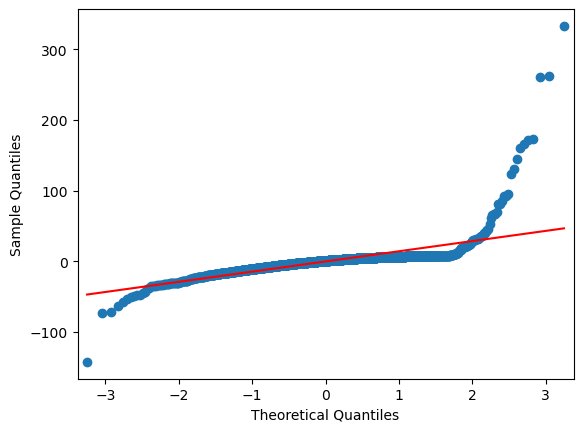

In [92]:
# Prediction
x = model.resid
sm.qqplot(x, line= 'r')
plt.show()

In [96]:
# defining dependent and independent variable
X = all_merged_df[['Average Boardings']]
y = all_merged_df['Averge Late Stop count']

# Adding a contant to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()


# Print the summary statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Averge Late Stop count   R-squared:                       0.349
Model:                                OLS   Adj. R-squared:                  0.349
Method:                     Least Squares   F-statistic:                     931.4
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):          4.25e-164
Time:                            14:16:18   Log-Likelihood:                -9317.6
No. Observations:                    1736   AIC:                         1.864e+04
Df Residuals:                        1734   BIC:                         1.865e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------